# Exploratory Data Analysis

This notebook focuses on the exploratory analysis of the `NYS Oil & Gas Wells` dataset. It aims to uncover initial insights and patterns through visualizations and statistical summaries by understanding feature distributions and examining relationships between features.

By the end of this notebook, we will have a thorough understanding of the dataset’s characteristics and the interactions between features, setting the stage for effective model development.

### Loading Tools and Data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_gaswells.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7511 entries, 0 to 7510
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gas_mcf    7511 non-null   float64
 1   type       7511 non-null   object 
 2   status     7511 non-null   object 
 3   depth      7511 non-null   float64
 4   elevation  7511 non-null   float64
 5   longitude  7511 non-null   float64
 6   latitude   7511 non-null   float64
 7   field      7511 non-null   object 
 8   geology    7511 non-null   object 
dtypes: float64(5), object(4)
memory usage: 528.2+ KB
None


,gas_mcf,type,status,depth,elevation,longitude,latitude,field,geology
0,"5,220.00",OD,IN,"1,252.00","2,192.00",-77.77,42.06,Beech Hill-Independence,Fulmer Valley
1,236.00,OD,IN,"1,176.00","2,210.00",-77.75,42.08,Beech Hill-Independence,Fulmer Valley
2,60.00,OD,IN,"2,071.00","2,175.35",-77.77,42.08,Beech Hill-Independence,Fulmer Valley
3,"3,437.00",OD,AC,"1,247.00","2,225.00",-77.75,42.08,Beech Hill-Independence,Fulmer Valley
4,"5,657.00",OD,PA,0.00,"2,180.21",-77.76,42.08,Beech Hill-Independence,Fulmer Valley


## Feature Understanding

*Plotting Feature Distributions*
- Histogram
- KDE
- Boxplot


---------------
FEATURE: GAS_MCF
---------------


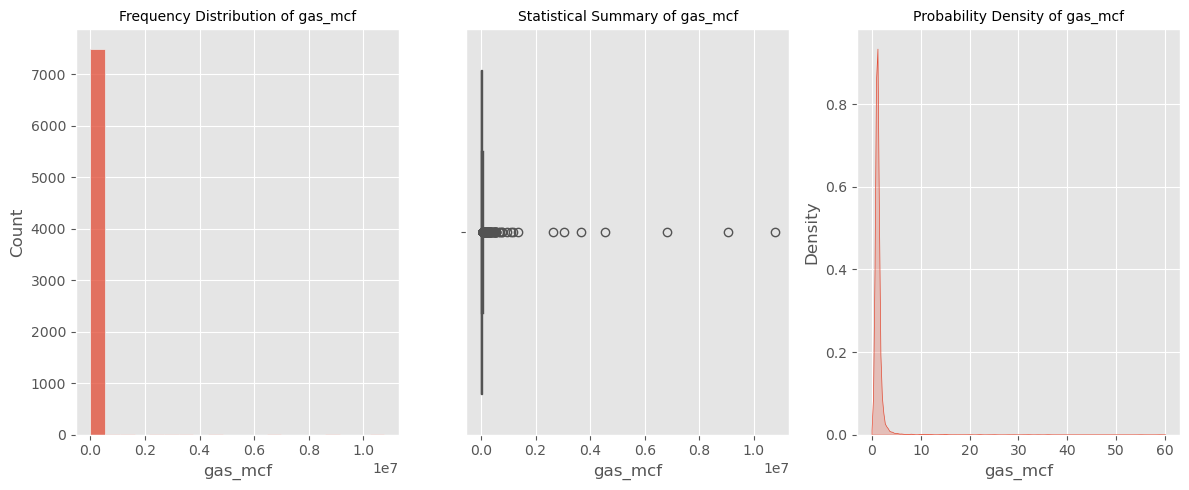


---------------
FEATURE: TYPE
---------------


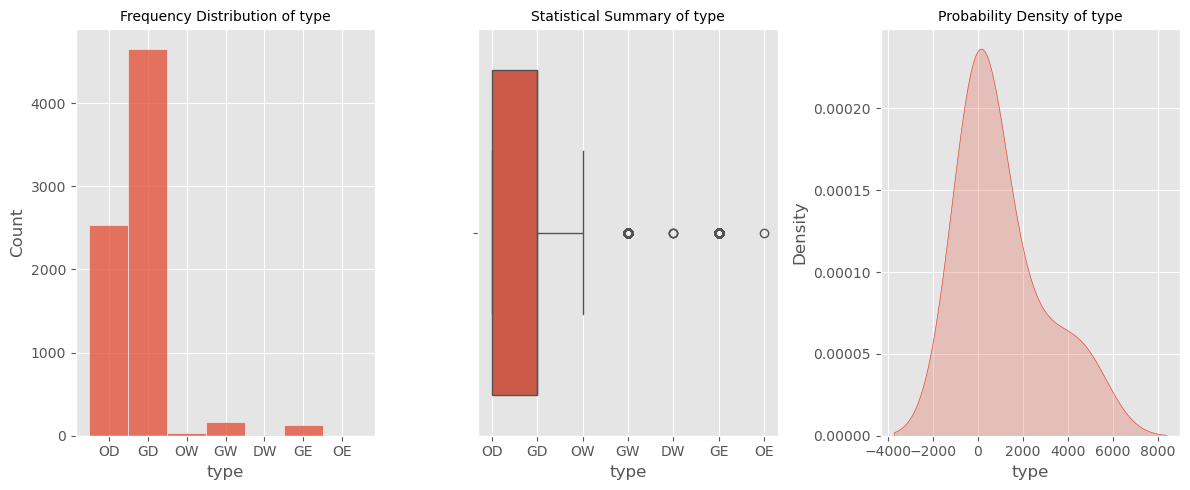


---------------
FEATURE: STATUS
---------------


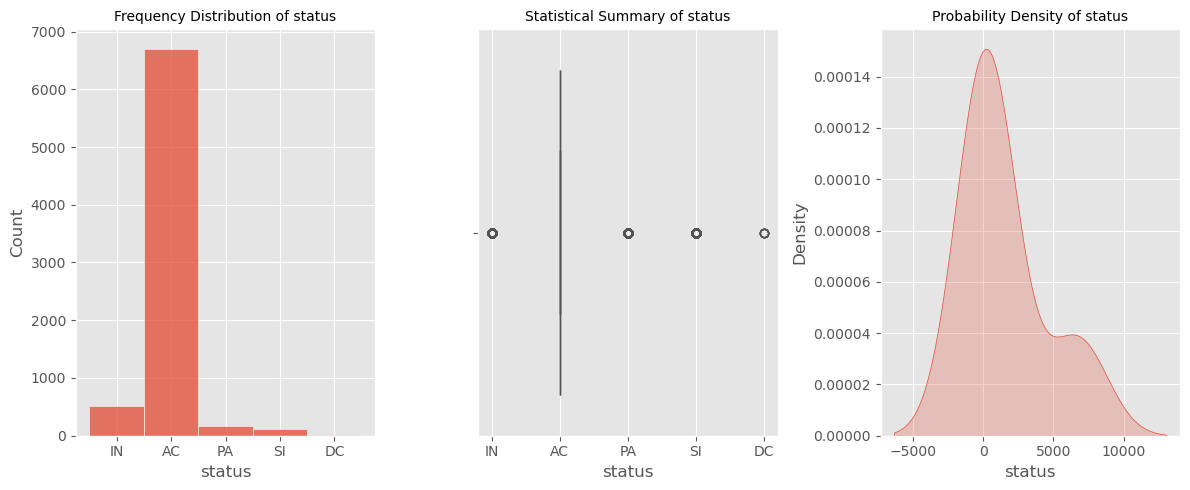


---------------
FEATURE: DEPTH
---------------


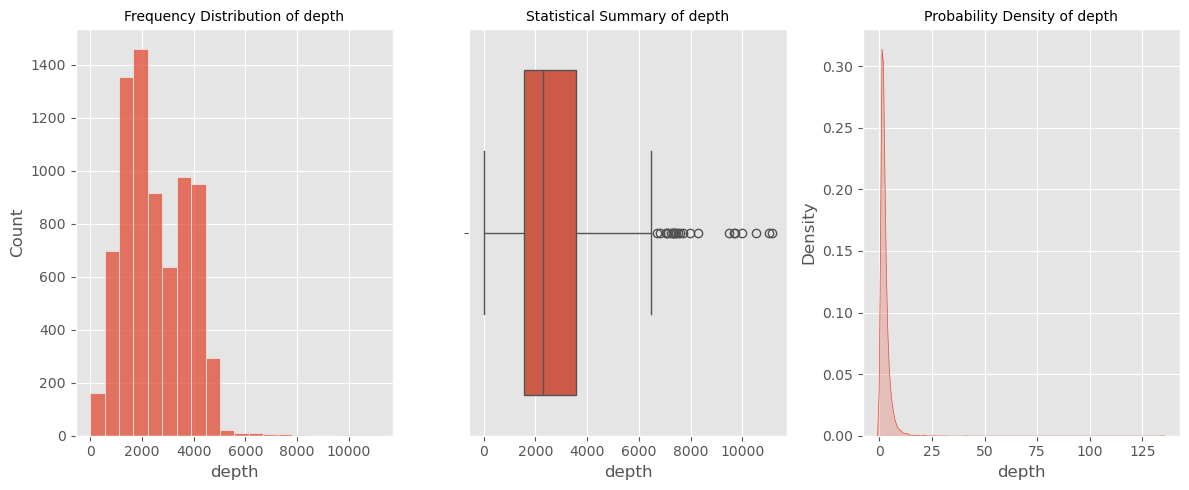


---------------
FEATURE: ELEVATION
---------------


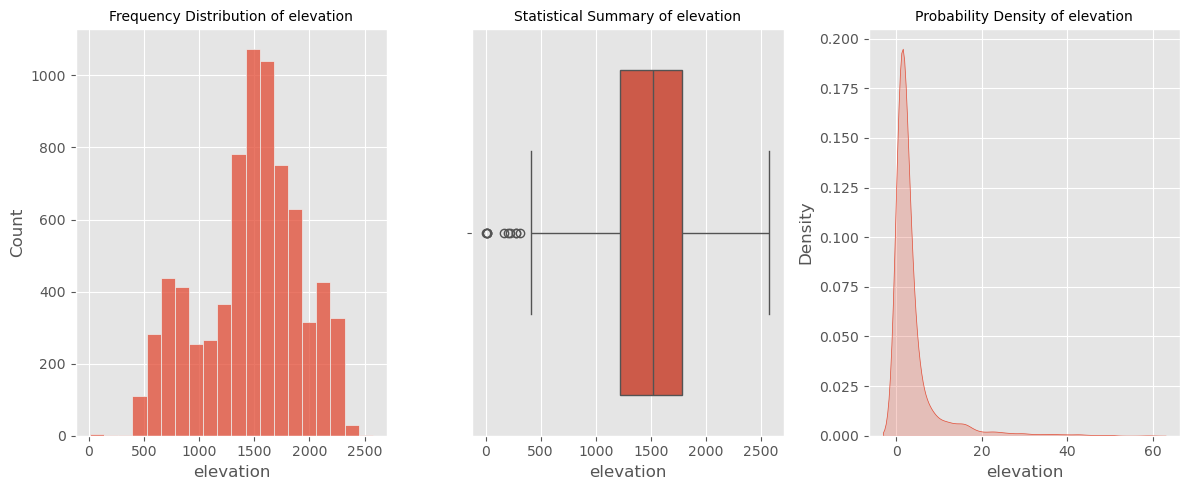


---------------
FEATURE: LONGITUDE
---------------


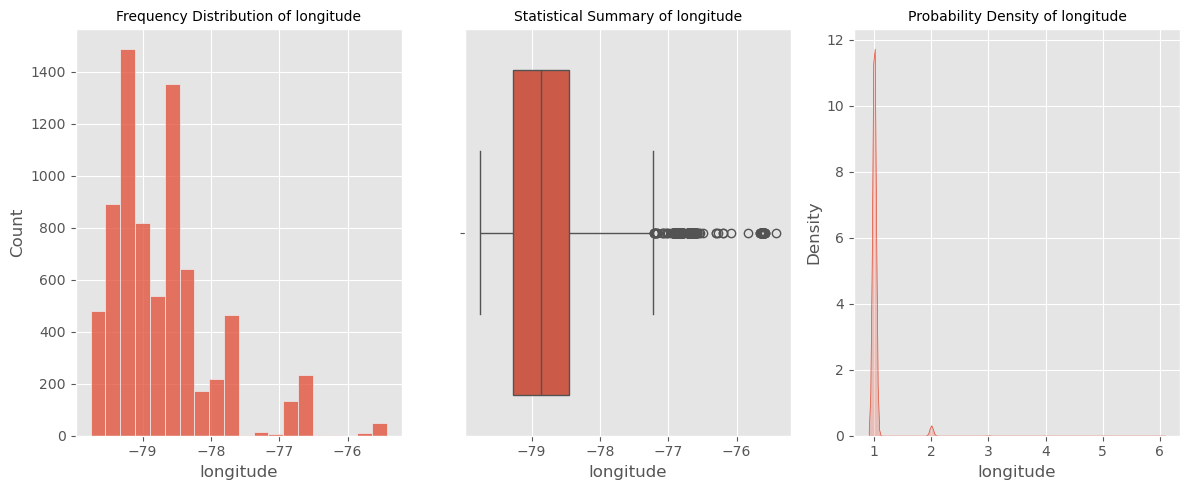


---------------
FEATURE: LATITUDE
---------------


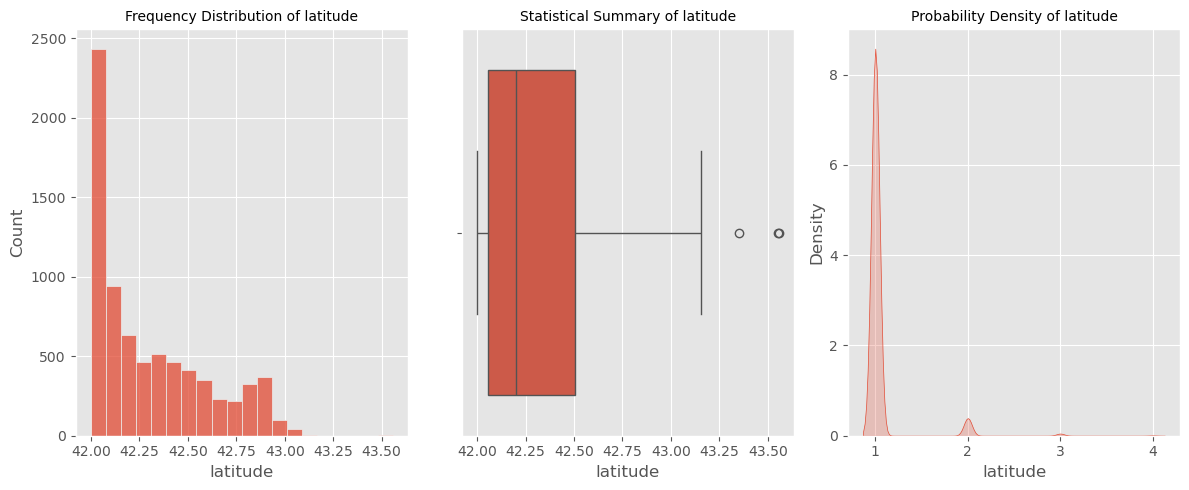


---------------
FEATURE: FIELD
---------------


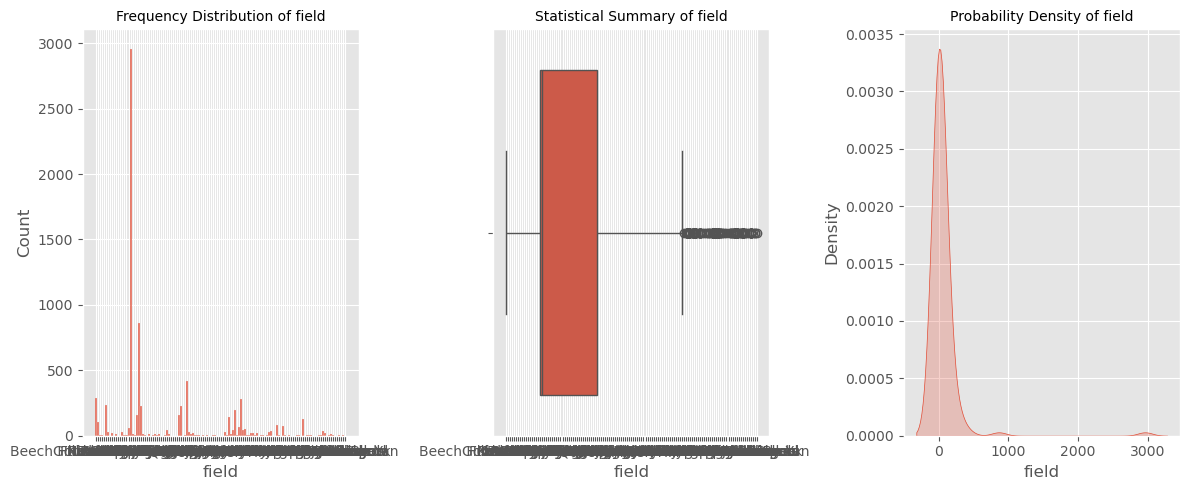


---------------
FEATURE: GEOLOGY
---------------


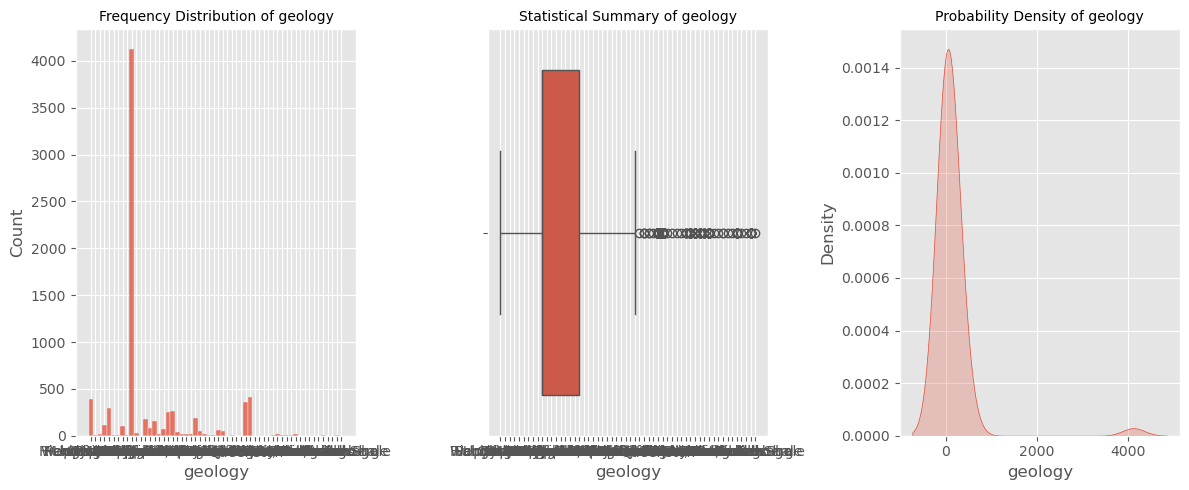

In [32]:
for column in df.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
    sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
    ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
    ax1.set_xlabel(column)
    
    sns.boxplot(ax=ax2, x=df[column])
    ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
    ax2.set_xlabel(column)

    sns.kdeplot(ax=ax3, data=df[column].value_counts(), shade=True)
    ax3.set_title(f'Probability Density of {column}', fontsize=10)
    ax3.set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

In [33]:
for column, rows in df.items():
    print('----------')
    print(f'{column} --- {df[column].unique()} --- {df[column].nunique()} | na {df[column].isna().sum()} | {df[column].dtype}')

----------
gas_mcf --- [ 5220.   236.    60. ... 11904. 10245.  2315.] --- 5700 | na 0 | float64
----------
type --- ['OD' 'GD' 'OW' 'GW' 'DW' 'GE' 'OE'] --- 7 | na 0 | object
----------
status --- ['IN' 'AC' 'PA' 'SI' 'DC'] --- 5 | na 0 | object
----------
depth --- [1252. 1176. 2071. ... 2218. 2319. 6447.] --- 3069 | na 0 | float64
----------
elevation --- [2192.         2210.         2175.34858388 ... 1439.         1103.
 1107.        ] --- 1949 | na 0 | float64
----------
longitude --- [-77.77378  -77.749226 -77.77203  ... -78.30921  -77.061988 -77.074521] --- 7309 | na 0 | float64
----------
latitude --- [42.06183  42.080622 42.08197  ... 42.85011  42.557975 42.733755] --- 7112 | na 0 | float64
----------
field --- ['Beech Hill-Independence' 'Richburg' 'Gordon Brook' 'Alfred'
 'Karr Valley' 'Fulmer Valley' 'Andover' 'Rushford' 'Ceres' 'Allen'
 'Beech Hill' 'Nile' "Ford's Brook" 'Sharon' 'Corbin Hill' 'Clarksville'
 'New Field Wildcat' 'Lakeshore' 'Olean' 'Not Applicable' 'Five Mil

## Feature Relationships
- Scatterplot
- Pairplot
- Heatmap Correlation
- Lineplots / Time
- Groupby Comparisons

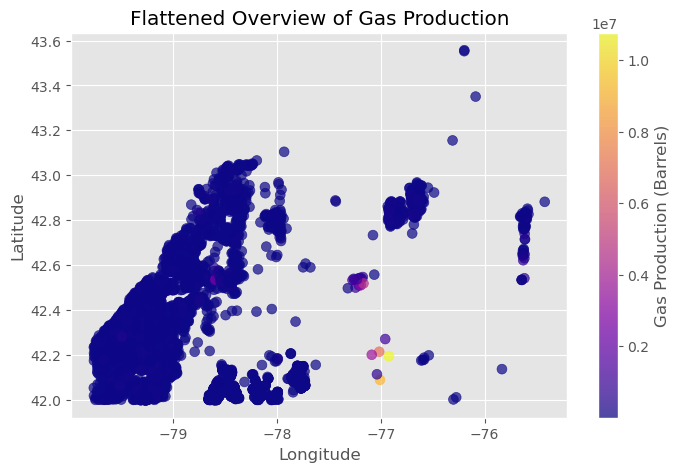

In [44]:
fig, ax = plt.subplots(1, figsize=(8,5))
corr_plot = ax.scatter(np.array(df['longitude']), np.array(df['latitude']), 
                       s=50, c=np.array(df['gas_mcf']).flatten(), cmap='plasma', alpha=0.7)
plt.colorbar(corr_plot).set_label('Gas Production (Barrels)')
plt.title('Flattened Overview of Gas Production')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.close()

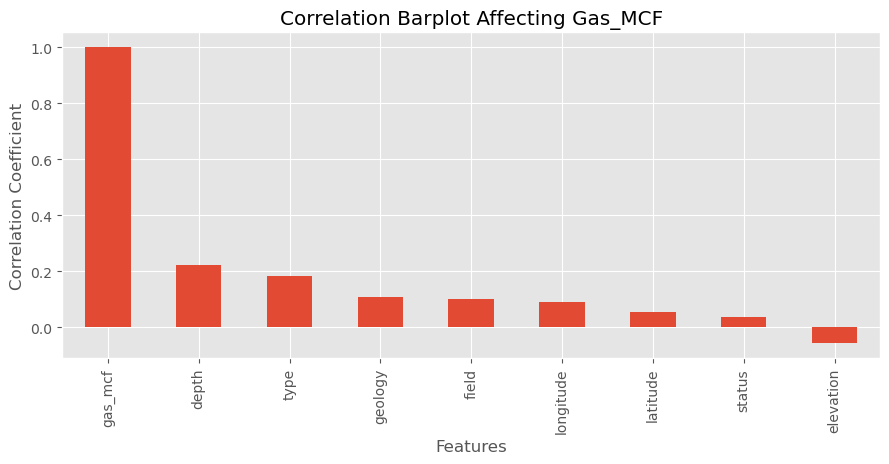

In [39]:
corr = df.copy()
label_mapping = {}

for column in corr.columns:
    if corr[column].dtype == 'O':
        unique_values = corr[column].unique()
        mapping = {value: i + 1 for i, value in enumerate(unique_values)}
        label_mapping[column] = mapping
        corr[column] = corr[column].map(mapping)

corr.corr()['gas_mcf'].sort_values(ascending=False).plot(kind='bar', figsize=(9,5))
plt.title('Correlation Barplot Affecting Gas_MCF')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

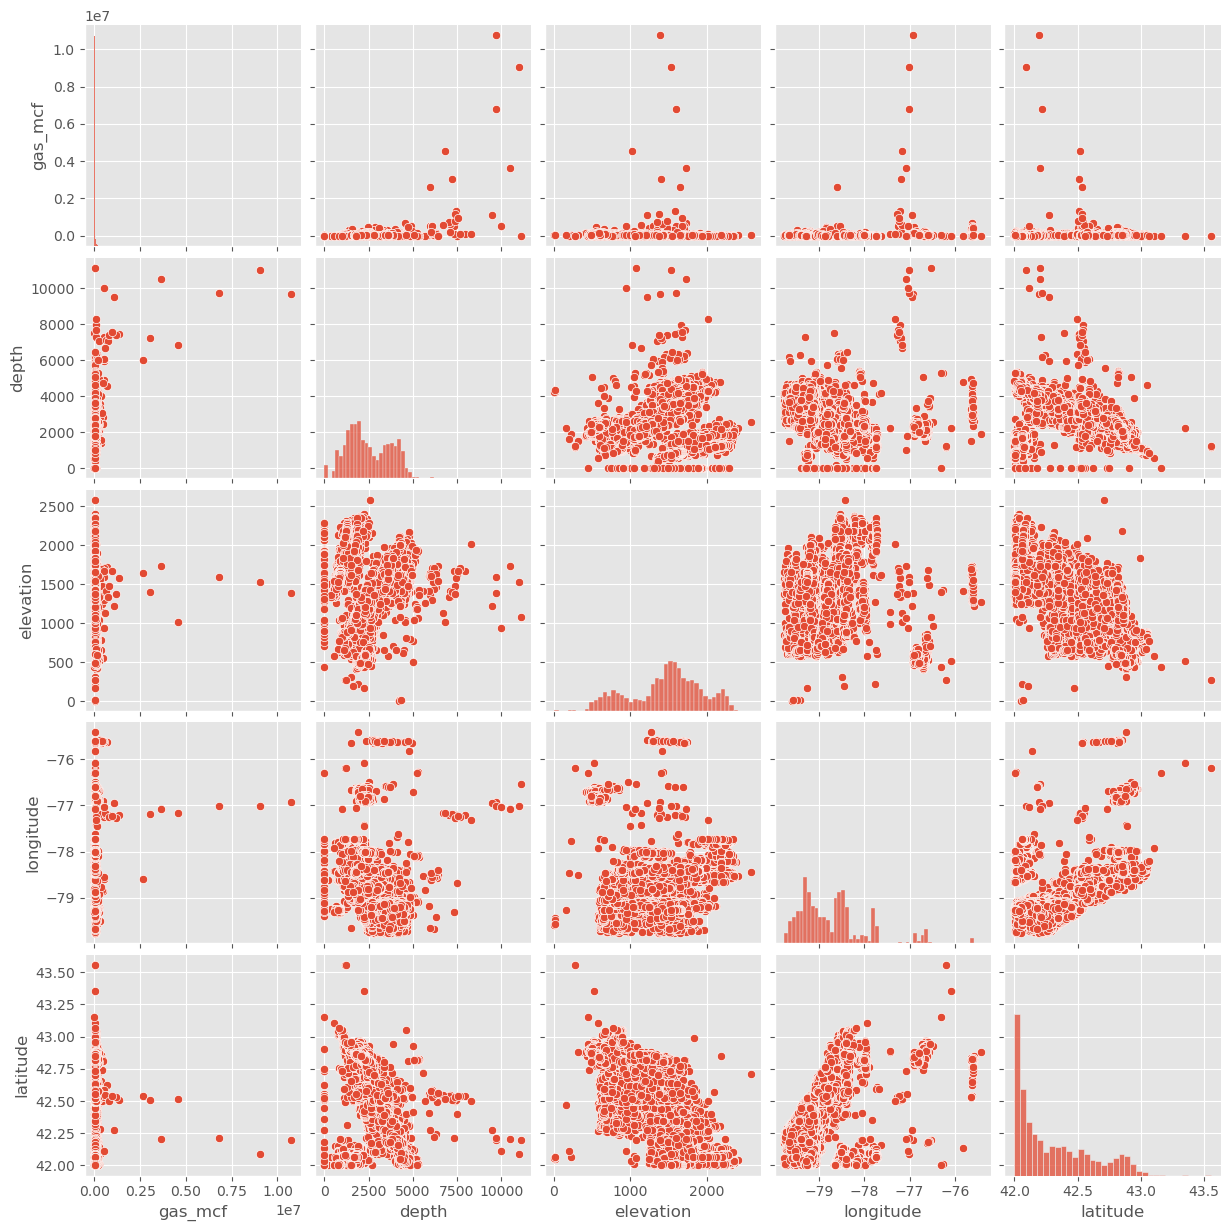

In [21]:
sns.pairplot(df)

In [12]:
df.shape

(7511, 9)

In [15]:
try:
    print('Script executed successfully.')
except:
    print('FAILED')

Script executed successfully.
